#Encontrando as cores mais dominantes em uma imagem usando K-means

##Importing libraries


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils
from google.colab.patches import cv2_imshow
from google.colab import drive

##Pre processing images

You can use any image do test the code functionality. If you prefer, download few images from project [repository](https://github.com/deborahmoreira/artificial_inteligence/tree/main/k-means).

In [3]:
#read the input image
img = cv2.imread('2.png')

#let's keep a copy as a good practice
img_copy = img.copy()

#show the shape of original image
print('Input image shape --> ',img.shape)

#standardize the size of the image
img = imutils.resize(img,height=200)
print('After resizing shape --> ',img.shape)

#concatenate all image columns in a single vector
flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)

Input image shape -->  (1280, 720, 3)
After resizing shape -->  (200, 112, 3)
After Flattening shape -->  (22400, 3)


##Executing k-means

We're going to use a [scikit learn library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to do all the work for us.

In [7]:
#choose how many clusters there will be (max up to 5)
clusters = 5
kmeans = KMeans(n_clusters=clusters,random_state=0)

In this step, the flattened image is working as an array containing all the pixel colors of the image. These pixel colors will now be clustered arround 5 centroids.

In [8]:
kmeans.fit(flat_img)

KMeans(n_clusters=5, random_state=0)

Storage the cluster centers, so we can calculate the dominance of each color

In [9]:
dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]

#create a list withpercentages and color together
p_and_c = zip(percentages,dominant_colors)

#sort in descending order
p_and_c = sorted(p_and_c,reverse=True)

##Resultados

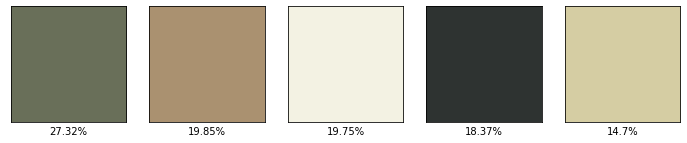

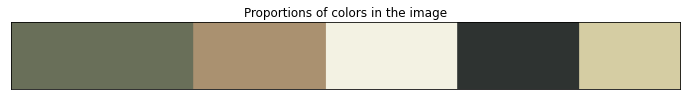

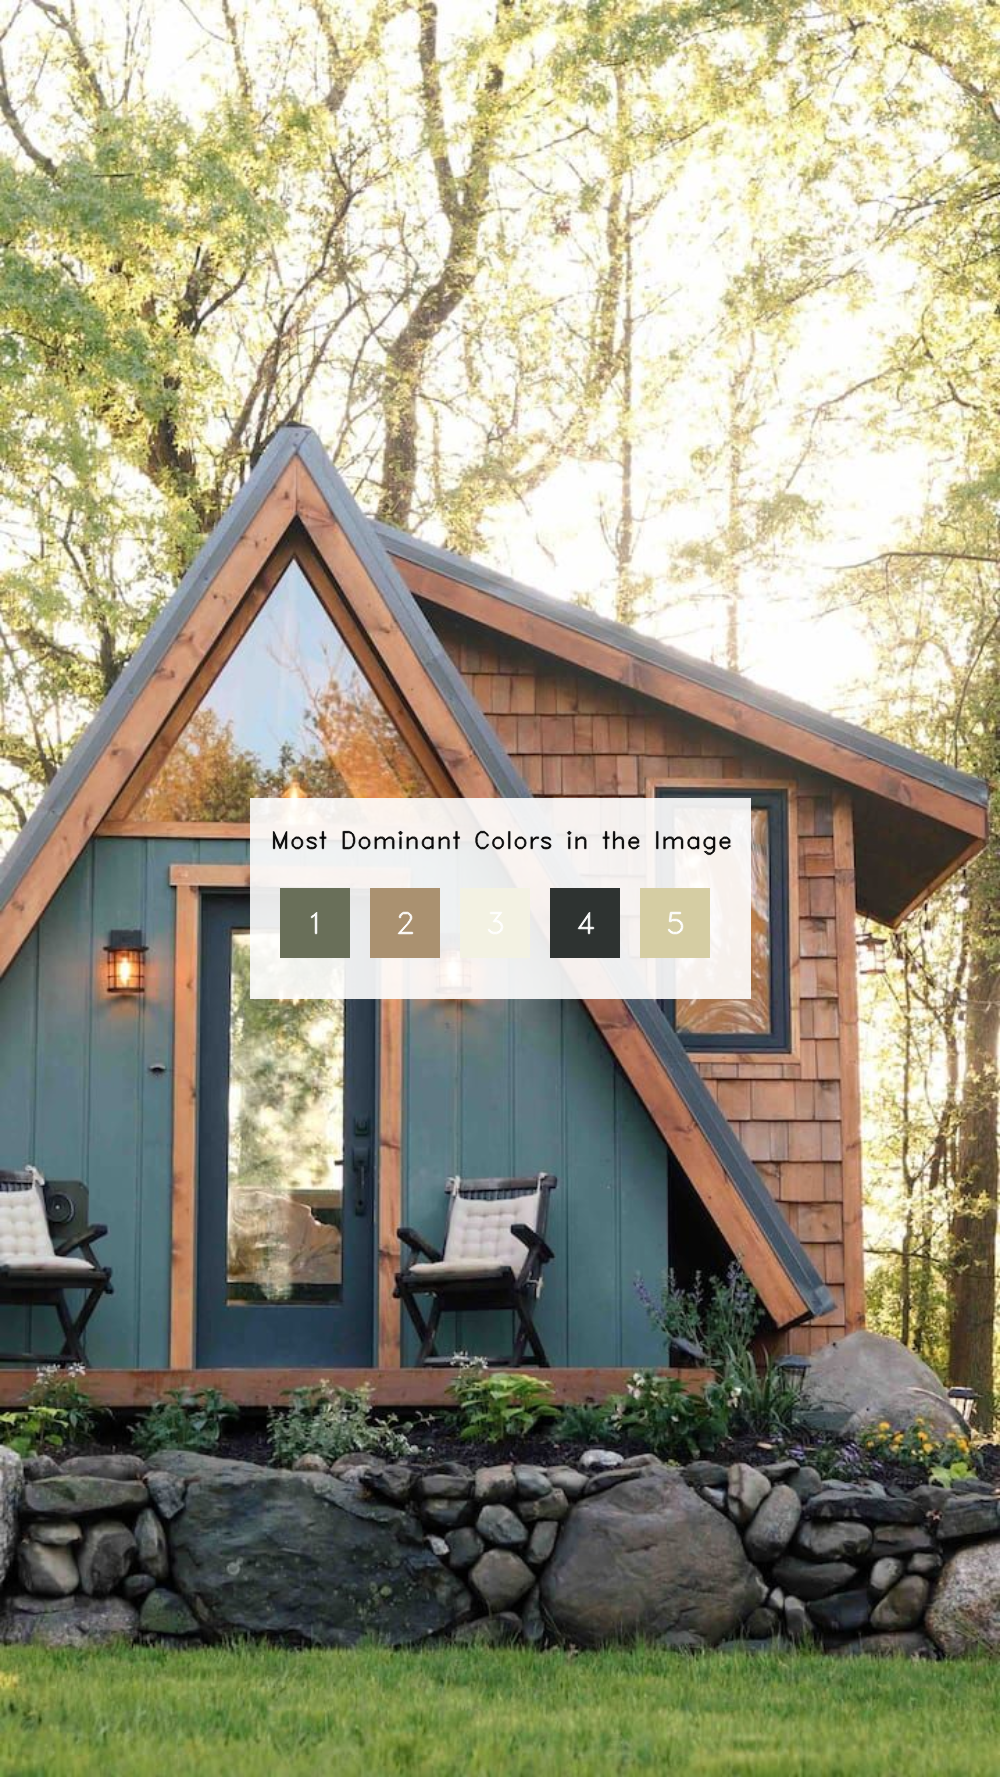

True

In [10]:
#plot blocks of dominant colors
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

#plot a more meaninful bar using proportions in blocks size
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1
plt.imshow(bar)
plt.xticks([])
plt.yticks([])

#create an output image as a result
rows = 1000
cols = int((img_copy.shape[0]/img_copy.shape[1])*rows)
img = cv2.resize(img_copy,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)
copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)
final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)
start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20
plt.show()
cv2_imshow(final)
cv2.waitKey(0)
cv2.destroyAllWindows()

#finally, save it
cv2.imwrite('output.png',final)